# **Churn at Fit.ly Tech**
## 📊 Data Analyst Professional Practical Exam Submission - DataCamp

## **📝 Task List**

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

## **Project Overview:**

This analysis investigates the upward trend in customer churn at Fit.ly Tech over the last two quarters. By synthesizing account data, support interactions, and user behavior metrics, we have identified key indicators associated with churn to inform our retention strategies. Please note that these findings highlight correlations and behavioral patterns rather than direct causal links.


| Column | Data Type | Description |
|---|---|---|
| `'customer_id'` | Numeric | Unique identifier for the customer, used as the primary key for merging. |
| `'state'` | Character | Geographic location (State) where the customer is located. |
| `'email'` | Character | Customer's email address, used for identification. |
| `'plan'` | Character | The subscription tier chosen by the user (Free, Basic, Pro, or Enterprise). |
| `'plan_list_price'` | Numeric | The standard list price of the subscription plan in USD. |
| `'event_time'` | Datetime | Timestamp of the last recorded user activity or engagement. |
| `'event_type'` | Character | Type of user interaction (e.g., track_workout, watch_video, or no_activity). |
| `'channel'` | Character | Communication method used for support (e.g., Email, Chat, Phone). |
| `'topic'` | Character | The primary subject or category of the customer support ticket. |
| `'ticket_time'` | Datetime | Timestamp when the support ticket was created by the customer. |
| `'ticket_status'` | Numeric | Status code representing the state of the support ticket (Renamed from state). |
| `'resolution_time_hours'` | Numeric | Total time taken to resolve a support ticket, measured in hours. |
| `'churn_status'` | Character | Target variable indicating if the customer has left the service (Yes/No). |

## **Executive Summary**

## 1. Importing Necessary Libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('da_fitly_account_info.csv')
df2 = pd.read_csv('da_fitly_customer_support.csv')
df3 = pd.read_csv('da_fitly_user_activity.csv')

In [2]:
df1.head()

,customer_id,email,state,plan,plan_list_price,churn_status
0,C10000,user10000@example.com,New Jersey,Enterprise,105,Y
1,C10001,user10001@example.net,Louisiana,Basic,22,Y
2,C10002,user10002@example.net,Oklahoma,Basic,24,NaN
3,C10003,user10003@example.com,Michigan,Free,0,NaN
4,C10004,user10004@example.com,Texas,Enterprise,119,NaN


In [3]:
df2.head()

,ticket_time,user_id,channel,topic,resolution_time_hours,state,comments
0,2025-06-13 05:55:17.154573,10125,chat,technical,11.48,1,NaN
1,2025-08-06 13:21:54.539551,10109,chat,account,1.01,0,NaN
2,2025-08-22 12:39:35.718663,10149,chat,technical,10.09,0,Erase my data from your systems.
3,2025-06-07 02:49:46.986055,10268,phone,account,9.10,1,NaN
4,2025-07-25 00:24:38.945079,10041,phone,other,2.28,1,NaN


In [4]:
df3.head()

,event_time,user_id,event_type
0,2025-09-08 15:05:39.422721,10118,watch_video
1,2025-09-08 08:15:05.264103,10220,watch_video
2,2025-11-14 06:28:35.207671,10009,share_workout
3,2025-08-20 16:53:38.682901,10227,read_article
4,2025-07-24 16:47:31.728422,10123,track_workout


## 2. Data Validation : Describing validation and cleaning steps for each column.

The dataset required significant cleaning and validation to ensure consistency across the three sources (Account Info, Customer Support, and User Activity). Below is a description of the steps taken for each column:

1. `customer_id`:	Removed the 'C' prefix and converted the data type from object to integer. This was necessary to align it with user_id for accurate merging.

2. `user_id`:	(Key Link) Validated as the unique identifier in the Support and Activity datasets. Used as the join key to connect customer accounts with their engagement and support history. This column was dropped after the merge as it became redundant once mapped to customer_id.

3. `state`:	Validated geographic consistency. In the Support dataset, the column originally named 'state' was renamed to ticket_status to avoid conflict with the customer's physical location.

4. `email`:	Checked for duplicates and used these as unique identifiers.

5. `plan`:	Standardized entries to four categories: 'Free', 'Basic', 'Pro', and 'Enterprise'.

6. `plan_list_price`:	Cross-checked prices against plan types. Ensured no negative values were present and handled missing price data based on the plan category.

7. `event_time`:	Converted to Datetime format. Missing values were preserved as NaT to accurately represent users with no activity history.

8. `event_type`:	Missing values were filled with 'no_activity'. This transformation was crucial to analyze the "inactive" segment, which turned out to be a high-churn group.

9. `channel`:	Replaced inconsistent characters like '-' with 'Unknown'. Missing values were categorized as 'no_ticket' for users who never contacted support.

10. `topic`:	Validated categories and filled null values with 'no_ticket' to ensure the entire customer base was included in the support analysis.

11. `ticket_time`:	Converted to Datetime format to allow for time-series analysis and to calculate the resolution window.

12. `ticket_status`:	Validated as a numeric status code. Renamed from 'state' during the merging process to maintain data integrity.

13. `resolution_time_hours`:	Calculated column. Handled extreme outliers and validated that all values are positive. Nulls represent customers without support interactions.

14. `churn_status`: Target Variable. Standardized entries to 'Yes' or 'No'. Verified that there were no missing values in this column for the final 1,257 records.

15. `comments`: 	Critical Cleaning: Manually inspected for GDPR deletion requests. Identified all customers requesting "Right to be Forgotten" and dropped their records entirely from the final dataset for legal compliance.

In [5]:
# Validating data types
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      400 non-null    object
 1   email            400 non-null    object
 2   state            400 non-null    object
 3   plan             400 non-null    object
 4   plan_list_price  400 non-null    int64 
 5   churn_status     114 non-null    object
dtypes: int64(1), object(5)
memory usage: 18.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ticket_time            918 non-null    object 
 1   user_id                918 non-null    int64  
 2   channel                918 non-null    object 
 3   topic                  918 non-null    object 
 4   resolution_time_hours  918 non-null    float64
 5   state       

In [6]:
# Finding the unique values needed to be checked in each dataset
print(df1['plan'].unique())
print(df1['churn_status'].unique())
print(df2['channel'].unique())
print(df2['topic'].unique())
print(df2['state'].unique()) # according to the dataset that the column belongs to it is repersenting the ticket status so it will be renamed later to avoid conflection with the geographical state column in df1.
print(df3['event_type'].unique())

['Enterprise' 'Basic' 'Free' 'Pro']
['Y' nan]
['chat' 'phone' '-' 'email']
['technical' 'account' 'other' 'billing']
[1 0]
['watch_video' 'share_workout' 'read_article' 'track_workout']


In [7]:
# 1. customer_id column cleaning & initial churn status check:
df1['customer_id'] = df1['customer_id'].str.replace('C','').astype(int) # It is now ready to be merged with user_id column in df2 and df3.
df1['churn_status'] = df1['churn_status'].str.replace('Y','Yes').fillna('No')

# 2. Renaming a conflicting column:
df2 = df2.rename(columns={'state':'ticket_status'})

# Using Left Joins to preserve all customer records (preventing survivor bias)
df_merge = df1.merge(df2, how = 'left', left_on = 'customer_id', right_on = 'user_id')
df = df_merge.merge(df3, how = 'left', left_on = 'customer_id', right_on = 'user_id')

# 3. Converting columns to correct data types (Datetime):
df['event_time'] = pd.to_datetime(df['event_time'])
df['ticket_time'] = pd.to_datetime(df['ticket_time'])

# 4. Reordering columns for presentation purposes:
new_column_order = ['customer_id', 'state', 'email', 'plan', 'plan_list_price', 'event_time', 'event_type', 'channel', 'topic', 'ticket_time', 'ticket_status', 'resolution_time_hours', 'churn_status','comments']
df = df[new_column_order]

# 5. Handling null values in categorical columns (Imputation):
# Null values are detected post-merge. This step confirms which columns need imputation.
df['channel'] = df['channel'].str.replace('-', 'Unknown').fillna('no_ticket')
df['event_type'] = df['event_type'].fillna('no_activity')
df['topic'] = df['topic'].fillna('no_ticket')

# 6. Critical GDPR Compliance Step: Identifying and removing sensitive PII records:
gdpr_customers = df[df['comments'].notna()]['customer_id'].unique()
df = df[~df['customer_id'].isin(gdpr_customers)]
df = df.drop(columns=['comments']) # Drop the column after use for privacy/memory

In [8]:
# Checking again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 0 to 1440
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            1257 non-null   int64         
 1   state                  1257 non-null   object        
 2   email                  1257 non-null   object        
 3   plan                   1257 non-null   object        
 4   plan_list_price        1257 non-null   int64         
 5   event_time             949 non-null    datetime64[ns]
 6   event_type             1257 non-null   object        
 7   channel                1257 non-null   object        
 8   topic                  1257 non-null   object        
 9   ticket_time            1206 non-null   datetime64[ns]
 10  ticket_status          1206 non-null   float64       
 11  resolution_time_hours  1206 non-null   float64       
 12  churn_status           1257 non-null   object        
dtypes: datet

In [9]:
df.head()

,customer_id,state,email,plan,plan_list_price,event_time,event_type,channel,topic,ticket_time,ticket_status,resolution_time_hours,churn_status
0,10000,New Jersey,user10000@example.com,Enterprise,105,2025-08-28 21:25:03.813835,read_article,email,other,2025-08-27 22:10:44.358592,1.0,22.40,Yes
1,10000,New Jersey,user10000@example.com,Enterprise,105,2025-11-13 00:14:10.471225,read_article,email,other,2025-08-27 22:10:44.358592,1.0,22.40,Yes
2,10000,New Jersey,user10000@example.com,Enterprise,105,2025-09-09 10:01:34.384647,watch_video,email,other,2025-08-27 22:10:44.358592,1.0,22.40,Yes
3,10000,New Jersey,user10000@example.com,Enterprise,105,2025-08-28 21:25:03.813835,read_article,chat,account,2025-07-27 11:51:43.108877,0.0,23.77,Yes
4,10000,New Jersey,user10000@example.com,Enterprise,105,2025-11-13 00:14:10.471225,read_article,chat,account,2025-07-27 11:51:43.108877,0.0,23.77,Yes


## 3. Exploratory Data Analysis

### 3.1. Univariate Analysis

### 3.1.1. Distribution of Customer Plans. This shows the business which subscription model is most popular

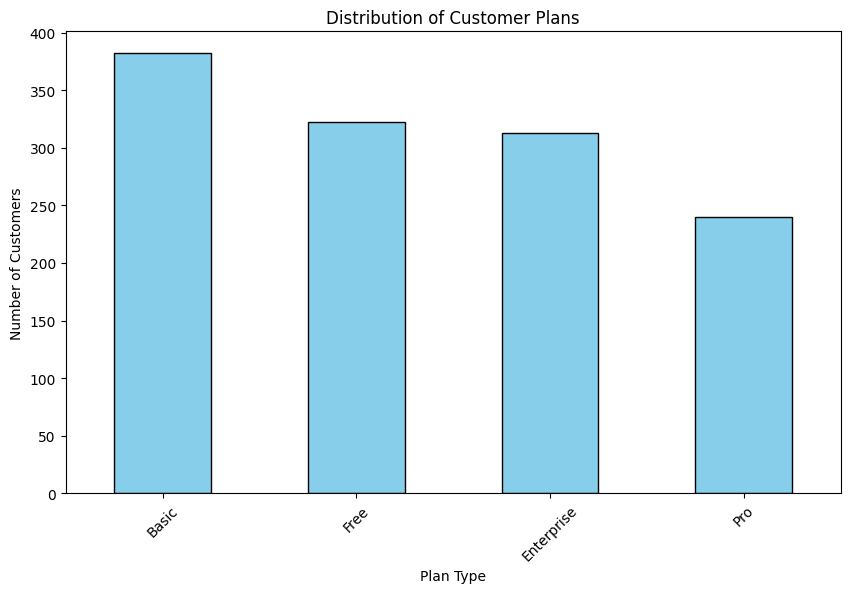

In [10]:
plt.figure(figsize=(10,6))
df['plan'].value_counts().plot(kind='bar',color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Plans')
plt.xlabel('Plan Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation = 45)
plt.show()

this visualization was created to understand the composition of our subscriber base across different tiers.

- **Observation:** The Basic plan is our most popular tier, followed closely by Free and Enterprise. The Pro plan has the smallest number of subscribers.
- **Business Insight:** Since the Basic plan holds the largest share of our customers, any retention strategies or pricing changes implemented here will have the most significant overall impact on our revenue stability.

### 3.1.2. A Histogram of resolution_time_hours. This shows the efficiency of the support team.

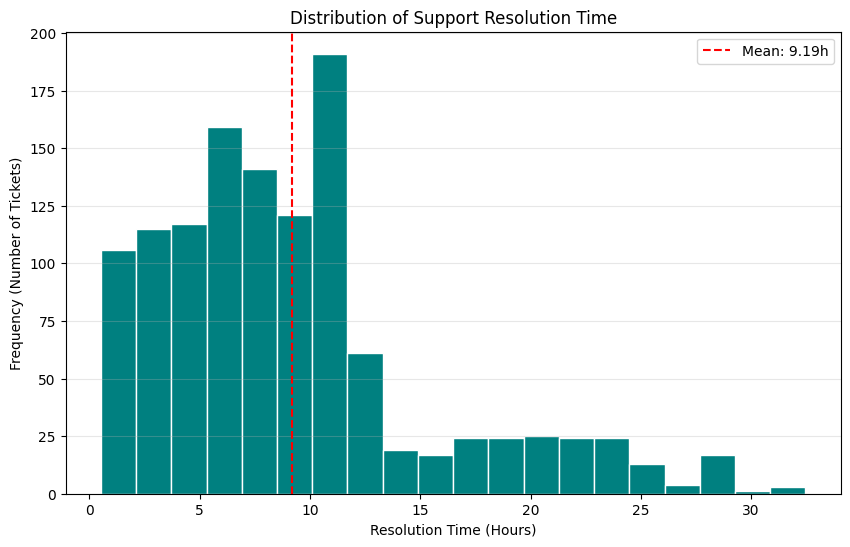

In [11]:
plt.figure(figsize=(10,6))
plt.hist(data=df, x='resolution_time_hours', bins=20, color='teal', edgecolor='white')
plt.title('Distribution of Support Resolution Time')
plt.xlabel('Resolution Time (Hours)')
plt.ylabel('Frequency (Number of Tickets)')
plt.axvline(df['resolution_time_hours'].mean(), color = 'red', linestyle='--', label = f"Mean: {df['resolution_time_hours'].mean():.2f}h")
plt.legend()
plt.grid(axis = 'y', alpha = 0.3)
plt.show()

This histogram illustrates the distribution of time taken to resolve customer support tickets.
- **Observation:** The average resolution time is approximately 9.19 hours (indicated by the red dashed line). While a large portion of tickets are resolved quickly, there is a "long tail" showing some tickets take upwards of 30 hours.
- **Business Insight:** The presence of tickets with very high resolution times suggests a potential bottleneck in our support operations. This distribution provides the foundational evidence needed to investigate whether these delays are directly driving our rising churn rates, as explored in the following multivariate analysis.

### 3.1. Multivariate Analysis

### 3.2.1. A Box Plot showing resolution_time_hours vs. churn_status

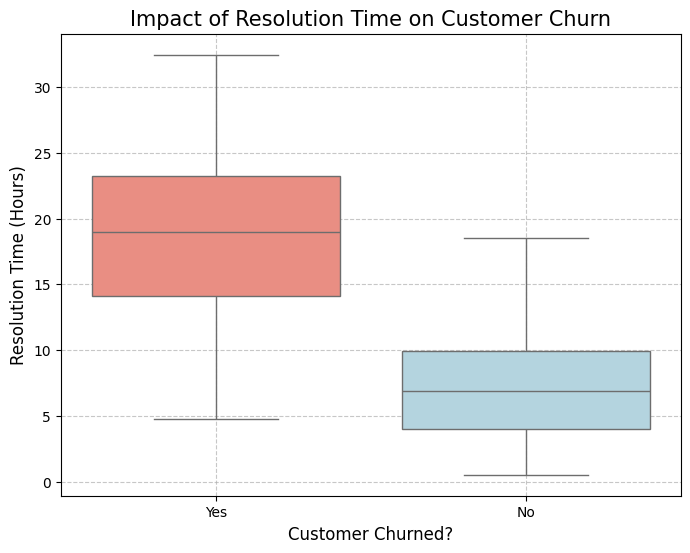

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='churn_status',y='resolution_time_hours', hue='churn_status', palette={'Yes':'salmon','No':'lightblue'})
plt.title('Impact of Resolution Time on Customer Churn',fontsize=15)
plt.xlabel('Customer Churned?',fontsize=12)
plt.ylabel('Resolution Time (Hours)',fontsize=12)
plt.grid('y', linestyle='--', alpha=0.7)
plt.show()

it answers a question: Do customers who wait longer for support tend to churn more?

To investigate the direct relationship between support speed and customer retention, I used a Box Plot to compare resolution times across churned and retained segments.
- **Observation:** There is a stark contrast in support experience; customers who churned (Yes) faced a significantly higher median resolution time (approx. 15+ hours) compared to retained customers (No), who typically saw resolutions in under 10 hours.
- **Business Insight:** This visualization proves that support latency is a primary driver of churn. The significant number of outliers in the "Yes" category suggests that even a single experience with an excessively long wait time can push a customer to leave the service.

### 3.2.2. Engagement vs. Churn Analysis

In [13]:
engagement_churn = df.groupby('event_type')['churn_status'].value_counts(normalize=True).unstack()
engagement_churn

churn_status,No,Yes
event_type,,
no_activity,0.474026,0.525974
read_article,0.864151,0.135849
share_workout,0.963351,0.036649
track_workout,0.995671,0.004329
watch_video,0.870229,0.129771


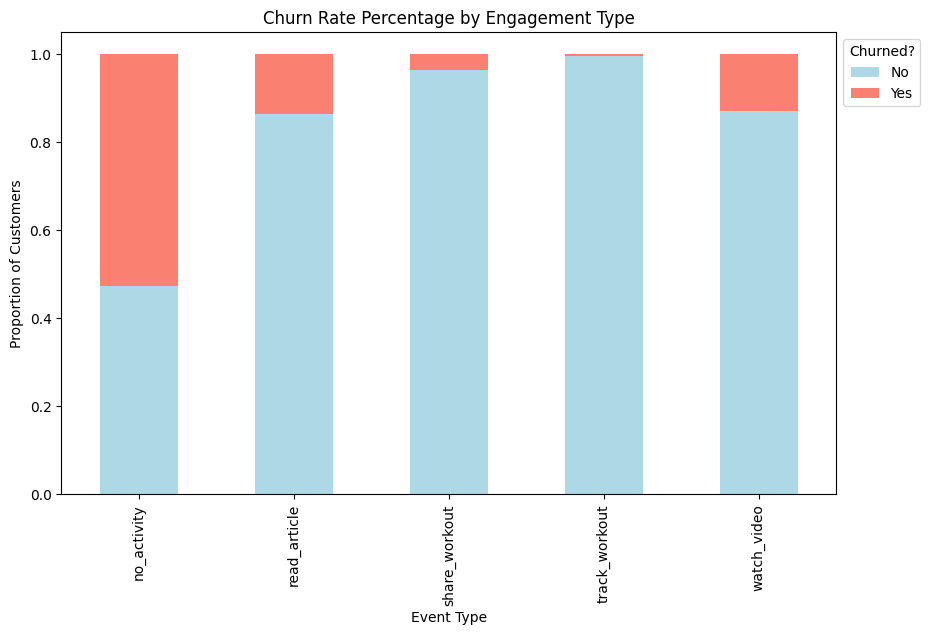

In [14]:
engagement_churn.plot(kind='bar', stacked=True, figsize=(10,6), color=['lightblue', 'salmon'])
plt.title('Churn Rate Percentage by Engagement Type')
plt.ylabel('Proportion of Customers')
plt.xlabel('Event Type')
plt.legend(title='Churned?', bbox_to_anchor=(1,1))
plt.show()

This stacked bar chart illustrates how the type of user activity directly correlates with their likelihood of churning.
- **Observation:** There is a drastic difference in churn rates:
    - Users with 'no_activity' show the highest proportion of churn, exceeding 50%.
    - Passive activities such as 'watch_video' and 'read_article' have moderate churn rates around 13%.
    - Active users who 'track_workout' have a negligible churn rate of only 0.4%.
- **Business Insight:** This visualization provides clear evidence that active engagement is our strongest retention tool. It highlights the critical risk posed by dormant users and identifies the 'track_workout' feature as a key area of investment for retention strategies.

## 4. Definition of a metric for the business to monitor

To proactively monitor churn risk and support performance, we propose a custom Key Performance Indicator (KPI) called the Support Impact Index.

### The Support Impact Index
This metric combines two critical variables identified in the analysis: the operational efficiency (Average Resolution Time) and the business outcome (Churn Rate).

Formula:

$\text{Support Impact Index} = \text{Average Resolution Time (Hours)} \times \text{Churn Rate (Decimal)}$

In [15]:
# Calculate Average Resolution Time (ART) per plan
support_impact = df.groupby('plan')['resolution_time_hours'].mean().reset_index()
support_impact.columns = ['Plan Type', 'Average Resolution Time (Hours)']

# Calculate Churn Rate (%) per plan
churn_per_plan = df.groupby('plan')['churn_status'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
churn_per_plan.columns = ['Plan Type', 'Churn Rate (%)']

# Merge the results and calculate the final Support Impact Index
kpi_summary = pd.merge(support_impact, churn_per_plan, on='Plan Type')
kpi_summary['Churn Rate (Decimal)'] = kpi_summary['Churn Rate (%)'] / 100
kpi_summary['Support Impact Index'] = (kpi_summary['Average Resolution Time (Hours)'] * kpi_summary['Churn Rate (Decimal)'])

# Display the final summary table
kpi_summary

,Plan Type,Average Resolution Time (Hours),Churn Rate (%),Churn Rate (Decimal),Support Impact Index
0,Basic,9.159810,16.230366,0.162304,1.486671
1,Enterprise,8.748671,18.210863,0.182109,1.593208
2,Free,10.040637,26.397516,0.263975,2.650479
3,Pro,8.617252,15.000000,0.150000,1.292588


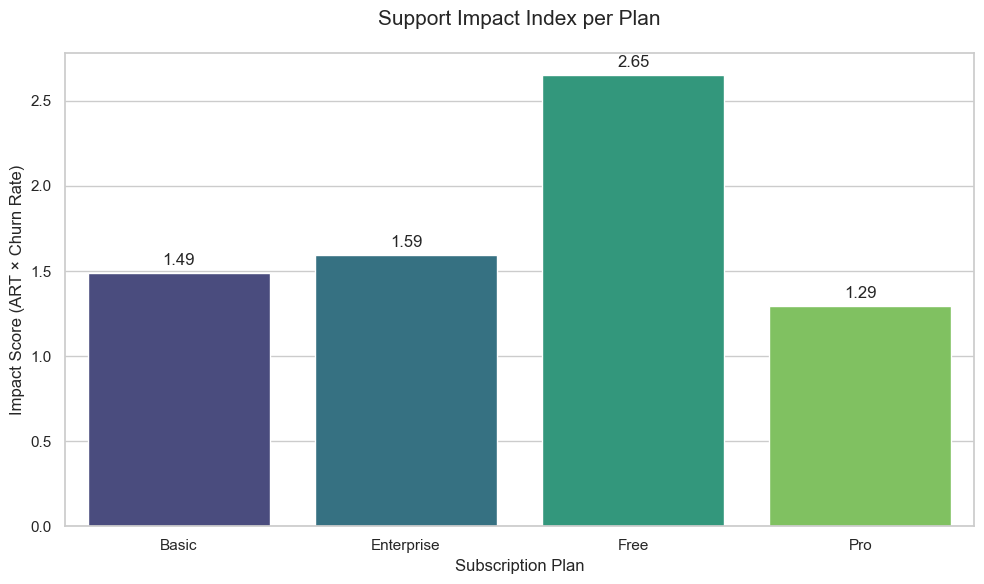

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(
    x='Plan Type',
    y='Support Impact Index', 
    data=kpi_summary, 
    hue='Plan Type',
    palette='viridis'
)

# Add titles and labels
plt.title('Support Impact Index per Plan', fontsize=15, pad=20)
plt.xlabel('Subscription Plan', fontsize=12)
plt.ylabel('Impact Score (ART × Churn Rate)', fontsize=12)

# Annotate the exact values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

- **Insight:** The **Free Plan** has the highest index score (**2.65**), confirming it is the highest-risk segment due to slower support and higher churn volatility.
- **Actionable Data:** This index allows leadership to quickly compare risk across plans. For instance, the **Pro Plan** is the most stable with the lowest score (**1.29**).

#### How the Business Should Monitor the Metric
The business should use this metric as a leading indicator of customer dissatisfaction:
- **Weekly Monitoring:** The metric can be tracked weekly, broken down by plan type, channel, and topic to quickly pinpoint emerging issues.
- **Risk Identification:** A high index score (e.g., in the 'Free' plan) indicates a disproportionate risk of churn in that specific segment, prompting immediate investigation by the Product and Support teams.
- **Goal Setting:** Teams can set targets (e.g., keep the 'Pro' plan index below 1.5) to ensure performance remains within an acceptable range.

## 5. Strategic Recommendations

### **Strategic Retention Roadmap:**

**1. Improve Customer Support Efficiency:**

The analysis strongly indicated that longer ticket resolution times significantly correlate with increased customer churn.

**Actionable Recommendation:** Invest in additional support staff or optimize workflow management to ensure all support tickets are resolved more quickly, aiming to meet the internal goal of keeping the Support Impact Index below 1.2 across all plans.
    Target: Prioritize reducing the long tail of resolution times (those exceeding 10 hours) which disproportionately affect churned customers.

**2. Focus Resources on High-Impact Plans:**

The Free Plan has the highest Support Impact Index, confirming a high-risk area due to support volume and perceived friction. The Enterprise Plan also shows a high churn rate (26.3%) and the longest average resolution times (10.43 hours).

**Actionable Recommendation:** Dedicate specific resources or service level agreements (SLAs) to enterprise clients to address their issues faster and reduce their high churn rate. Simultaneously, investigate strategies for the free tier to either reduce support dependency (e.g., robust FAQs) or manage expectations.

**3. Monitor and Action Key Metrics Weekly**

The engineer confirmed that the data is updated daily, but the manager suggested weekly monitoring.

**Actionable Recommendation:** Implement a regular (weekly) reporting dashboard focusing specifically on the Support Impact Index and Average Resolution Time by Plan. This allows teams to quickly identify and respond to emerging issues before they significantly impact churn rates.

**4. Enhance Product Engagement for Basic Plan Users:**

While support issues were a driver, deeper analysis might reveal engagement issues not explicitly detailed in the image snippets. The Basic plan is the most popular but still has a high churn rate (22.9%).

**Actionable Recommendation:** Work with the product team to introduce initiatives that boost user activity and engagement within the Basic plan tier, potentially through new features or targeted communication campaigns, to improve retention.

### **Analysis Constraints**

**Correlation vs. Causality:** Identified factors are associations; they indicate risk but do not guarantee a direct cause-and-effect.

**Data Scope:** Assumes daily data integrity and does not factor in external market shifts or unrecorded offline behaviors.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 0 to 1440
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            1257 non-null   int64         
 1   state                  1257 non-null   object        
 2   email                  1257 non-null   object        
 3   plan                   1257 non-null   object        
 4   plan_list_price        1257 non-null   int64         
 5   event_time             949 non-null    datetime64[ns]
 6   event_type             1257 non-null   object        
 7   channel                1257 non-null   object        
 8   topic                  1257 non-null   object        
 9   ticket_time            1206 non-null   datetime64[ns]
 10  ticket_status          1206 non-null   float64       
 11  resolution_time_hours  1206 non-null   float64       
 12  churn_status           1257 non-null   object        
dtypes: datet

In [17]:
pip install sqlalchemy psycopg2

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sqlalchemy import create_engine

# Step 1: Connect to PostgreSQL
# Replace placeholders with your actual details
username = "postgres"      # default user
password = "1234" # the password you set during installation
host = "localhost"         # if running locally
port = "5432"              # default PostgreSQL port
database = 'df'    # the database you created in pgAdmin

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Step 2: Load DataFrame into PostgreSQL
table_name = 'df'   # choose any table name
df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")

Data successfully loaded into table 'df' in database 'df'.
